## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None) # shows me all columns instead of truncating and dot dot dot

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

from scipy.stats import kurtosis, skew
import scipy.stats as stats

from math import sqrt

import statsmodels.formula.api as smf

##### inspect dataframe

In [3]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


##### observations - we can do away with id since that is some kind of internal tracking convention, liklely specific to Kings County

##### date is the date the home was sold; this should be more descriptive


In [5]:
df = df.rename({'date':'date_sold'}, axis = 1)  #rename date to date_sold
df.head(0)

,id,date_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [6]:
df.drop(columns = 'id', inplace = True)

<font color = 'green'> <font size = 5> **Deal with NaN values**

In [7]:
df.isna().sum()

date_sold           0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

##### lets inspect waterfront, view and yr_renovated and decide how to handle the respective null values

###### waterfront

In [8]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [9]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

11% of values in Waterfront are NaN; feels like too much to drop.  I will replace the NaN values with zero and<br>
deal with outliers later in EDA/modeling

In [10]:
df.waterfront = df.waterfront.fillna(0)

###### view

In [11]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

view has only 63 NaN rows; will drop them

In [12]:
df = df.dropna(subset = ["view"])

###### yr_renovated

In [13]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

cannot remove 18% of data<br>
doesn't make sense to imputate<br>
will fill NaN values with zero (never been renovated) and handle outliers in EDA/modeling

In [14]:
df.yr_renovated = df.yr_renovated.fillna(0)

In [15]:
df.isna().sum()

date_sold        0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<font color = 'green'> <font size = 5> **Correct data types**

can change to float or int, must deal with categoricals or date in EDA/modeling

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
date_sold        21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


##### price

In [17]:
df.price.unique()

array([221900., 538000., 180000., ..., 594866., 541800., 402101.])

price has a decimal at end so should be an int

In [18]:
df.price = df.price.astype("int64")



view to int (categorical instead?) <br>
sqft_basement to int<br>
yr_renovated to int


##### waterfront

In [19]:
df.waterfront.unique()

array([0., 1.])

waterfront will become a category type later but for now will coerce to int

In [20]:
df.waterfront = df.waterfront.astype("int64")

##### view

In [21]:
df.view.unique()

array([0., 3., 4., 2., 1.])

view will become a category type later but for now will coerce to int.

In [22]:
df.view = df.view.astype("int64")

### sqft_basement

In [23]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0',
       '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0',
       '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0',
       '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0', '210.0',
       '1430.0', '1950.0', '440.0', '220.0', '1160.0', '860.0', '580.0',
       '2060.0', '1820.0', '1180.0', '200.0', '1150.0', '1200.0', '680.0',
       '530.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0', '870.0',
       '1100.0', '460.0', '1400.0', '660.0', '1220.0', '900.0', '420.0',
       '1580.0', '1380.0', '475.0', '690.0', '270.0', 

basement feature has 452 queustion mark place-holders<br>
remove column, remove records or imputate?<br>


could delete the 452 observations since its only 2% of the dataset though, I think its reasonable to imputate<br>
with the column median, exclusing the zero values; the thinking being that if they did not have a basement, then their answer would have been an obvious zero<br>
though, they likely did not know the square footage, hence, the question mark.  I will imputate with median

##### find median value for sqft_basement after taking out the "?" and zeros 

In [24]:
df_adhoc = df[df.sqft_basement != '0.0']

In [25]:
df_adhoc = df_adhoc[df_adhoc.sqft_basement != '?']

In [26]:
df_adhoc.sqft_basement.unique()

array(['400.0', '910.0', '1530.0', '730.0', '1700.0', '300.0', '970.0',
       '760.0', '720.0', '700.0', '820.0', '780.0', '790.0', '330.0',
       '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0', '600.0',
       '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0', '880.0',
       '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0', '840.0',
       '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0', '1250.0',
       '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0', '1640.0',
       '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0', '490.0',
       '1310.0', '630.0', '2000.0', '390.0', '430.0', '210.0', '1430.0',
       '1950.0', '440.0', '220.0', '1160.0', '860.0', '580.0', '2060.0',
       '1820.0', '1180.0', '200.0', '1150.0', '1200.0', '680.0', '530.0',
       '1450.0', '1170.0', '1080.0', '960.0', '280.0', '870.0', '1100.0',
       '460.0', '1400.0', '660.0', '1220.0', '900.0', '420.0', '1580.0',
       '1380.0', '475.0', '690.0', '270.0', '350.0', '93

In [27]:
df_adhoc.sqft_basement = df_adhoc.sqft_basement.astype("float64")

In [28]:
df_adhoc.sqft_basement.median()

700.0

##### median value for sqft_basement is 700; will replace all "?" with 700

In [29]:
df.sqft_basement = df.sqft_basement.replace("?", 700)

In [30]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', 700, '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0',
       '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0',
       '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0',
       '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0', '210.0',
       '1430.0', '1950.0', '440.0', '220.0', '1160.0', '860.0', '580.0',
       '2060.0', '1820.0', '1180.0', '200.0', '1150.0', '1200.0', '680.0',
       '530.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0', '870.0',
       '1100.0', '460.0', '1400.0', '660.0', '1220.0', '900.0', '420.0',
       '1580.0', '1380.0', '475.0', '690.0', '270.0', 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
date_sold        21534 non-null object
price            21534 non-null int64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null int64
view             21534 non-null int64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(5), int64(13), object(2)
memory usage: 3.5+ MB


In [32]:
df.sqft_basement = df.sqft_basement.astype("float64")

In [33]:
df.sqft_basement = df.sqft_basement.astype("int64")

##### yr_renovated

In [34]:
df.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [35]:
df.yr_renovated = df.yr_renovated.astype("int64")

##### save cleaned data to new csv file

In [36]:
df.to_csv("cleaned_kc_housing_data.csv")


<font color = 'red'><font size = 5>***END DATA SCRUB***


<font color = 'green'><font size = 5> **Begin check for multicoliniarity**

In [37]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.259220,0.395734,0.035393,0.668307,0.605695,0.316894,0.054273,0.117982,-0.053620,0.307868,0.022417,0.585304,0.083189
bedrooms,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,-0.003733,0.078523,0.026402,0.356095,0.479148,0.296325,0.155462,0.017797,-0.153990,-0.010415,0.132318,0.392874,0.030952
bathrooms,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.061115,0.186451,-0.126682,0.665312,0.686173,0.275965,0.507565,0.046955,-0.204435,0.024487,0.225025,0.569139,0.088854
sqft_living,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.101982,0.282532,-0.059783,0.762398,0.876553,0.424665,0.318217,0.050871,-0.199839,0.052383,0.241856,0.756208,0.184801
sqft_lot,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.021465,0.075298,-0.008375,0.115122,0.184325,0.015519,0.052646,0.005091,-0.129846,-0.085143,0.230137,0.145142,0.717095
floors,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.020357,0.028436,-0.264138,0.458694,0.523367,-0.239841,0.489410,0.003317,-0.058966,0.049419,0.125329,0.279176,-0.010850
waterfront,0.259220,-0.003733,0.061115,0.101982,0.021465,0.020357,1.000000,0.382000,0.016224,0.081195,0.069931,0.081428,-0.025000,0.074327,0.029490,-0.012282,-0.037845,0.082352,0.030605
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.382000,1.000000,0.045735,0.249727,0.166299,0.271596,-0.054564,0.090324,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.016224,0.045735,1.000000,-0.147326,-0.158830,0.166911,-0.361398,-0.055730,0.002125,-0.015594,-0.105475,-0.093172,-0.002702
grade,0.668307,0.356095,0.665312,0.762398,0.115122,0.458694,0.081195,0.249727,-0.147326,1.000000,0.755977,0.163172,0.448255,0.015235,-0.185710,0.113787,0.200821,0.713462,0.121435


In [38]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False


the following present multicolinearity:<br>

bathrooms + sqft_living<br>
sqft_living + grade<br>
sqft_living + sqft_above<br>
sqft_living + sqft_living15<br>
grade + sqft_above<br>


sqft_living is is correlated with more than several features; will remove said feature form OLS model<br>
also seeing coliniearity between sqft_lot and sqft_lot15; will remove sqft_lot15


In [39]:
df.drop(columns = 'sqft_living', inplace = True)

In [40]:
df.head(1)

,date_sold,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900,3,1.0,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


In [41]:
df.drop(columns = 'sqft_lot15', inplace = True)

In [42]:
df.head(1)

,date_sold,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,10/13/2014,221900,3,1.0,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340


<font color = 'red'><font size = 5> **END CHECK FOR MULTICOLINEARITY**

<font color = 'green'><font size = 5> **Begin EDA**

In [43]:
df.head(5)

,date_sold,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
0,10/13/2014,221900,3,1.00,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340
1,12/9/2014,538000,3,2.25,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690
2,2/25/2015,180000,2,1.00,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720
3,12/9/2014,604000,4,3.00,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360
4,2/18/2015,510000,3,2.00,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800


In [44]:
df.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
count,2.153400e+04,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,5.400577e+05,3.373038,2.115712,1.509060e+04,1.494126,0.006734,0.233863,3.409724,7.657425,1788.557537,299.937355,1971.002275,68.866722,98077.939352,47.560180,-122.213948,1986.299944
std,3.660596e+05,0.926410,0.768602,4.138021e+04,0.539806,0.081783,0.765686,0.650654,1.172643,827.745641,441.249993,29.376044,364.314552,53.506639,0.138528,0.140735,685.121001
min,7.800000e+04,1.000000,0.500000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000
25%,3.220000e+05,3.000000,1.750000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000
50%,4.500000e+05,3.000000,2.250000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.230000,1840.000000
75%,6.450000e+05,4.000000,2.500000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,600.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000
max,7.700000e+06,33.000000,8.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 18 columns):
date_sold        21534 non-null object
price            21534 non-null int64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null int64
view             21534 non-null int64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null int64
yr_built         21534 non-null int64
yr_renovated     21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
dtypes: float64(4), int64(13), object(1)
memory usage: 3.1+ MB


##### lets look at what we think are categorical variables and confirm our findings
##### do we need to do anything further on any of these?

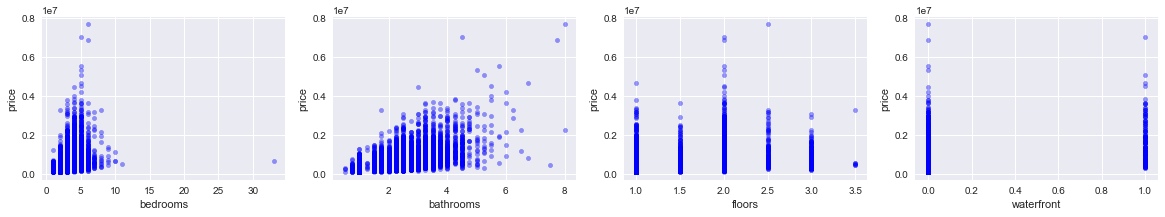

In [46]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'bedrooms', 'bathrooms', 'floors', 'waterfront'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

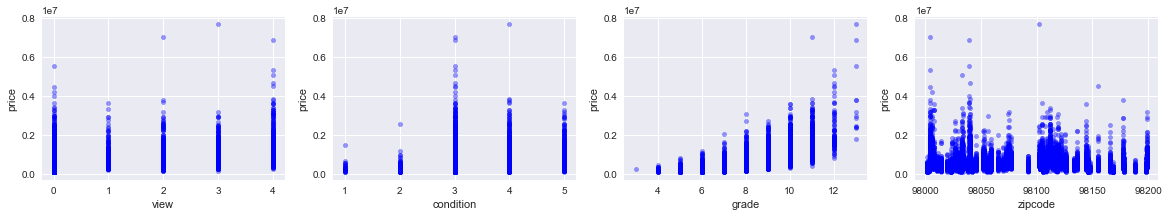

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'view', 'condition', 'grade', 'zipcode'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

lets look at bedrooms and remove outliers<br>
same for bathrooms<br>
waterfront is already binary; is changing type to category sufficient or do we need to label encode?<br>
roll zipcodes into  towns<br>

makes sense to cut some outlier observations from the bedroom and bathroom features to bring them closer to a normal distribution


##### remove outliers from categoricals

In [48]:
df = df[df.bedrooms < 10]
df = df[df.bathrooms < 5]

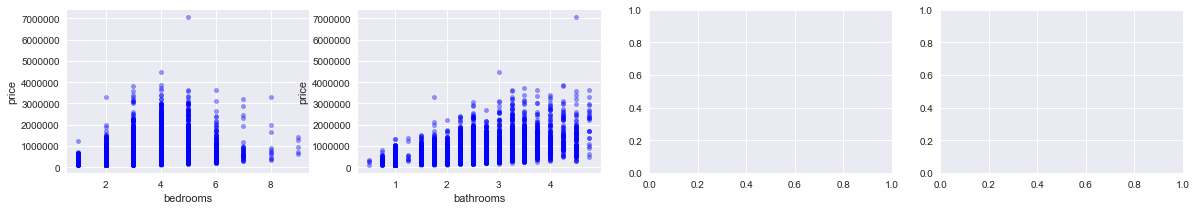

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'bedrooms', 'bathrooms'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

##### lets plot the continuous/discrete variables

KeyError: 'sqft_living'

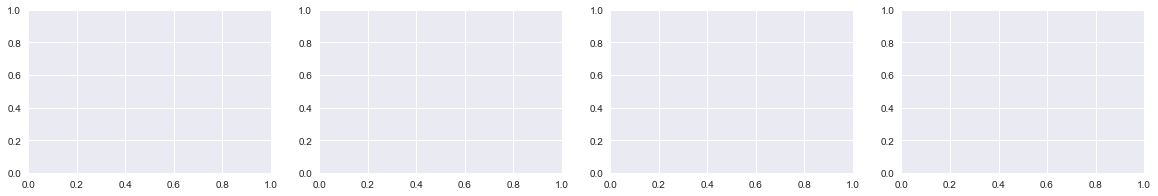

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

##### clearly we can remove outliers from almost all of these features

In [ ]:
df.shape

In [ ]:
df = df[df.sqft_living < 6000]
df = df[df.sqft_lot < 500000]
df = df[df.sqft_above < 6000]
df = df[df.sqft_basement < 2000]
df = df[df.sqft_living15 < 5000]
df = df[df.sqft_lot15 < 300000]

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'sqft_living15', 'sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

#### bin(?) zip codes into towns and merge with df

In [ ]:
df1 = pd.read_csv("zipcode_town.csv")

In [ ]:
df1.head()

### merge both dataframes on zip code and pull in town

In [ ]:
df2 = df.merge(df1, on = "zipcode", how = "left")

In [ ]:
df2.info()

In [ ]:
df2.tail()

#### remove zipcode, lat and long

In [ ]:
df = df2.drop(columns = "zipcode")

In [ ]:
df = df.drop(columns = ['lat', 'long'])

In [ ]:
df.info()

In [ ]:
df.head()

<font color = 'red'><font size = 5> **END EDA**

<font color = 'green'><font size = 5> **Begin Modeling**

##### change type to category on categoricals for modeling

In [ ]:
df.date_sold = df.date_sold.astype("datetime64")
df.bedrooms = df.bedrooms.astype('category')
df.bathrooms = df.bathrooms.astype('category')
df.floors = df.floors.astype('category')
df.waterfront = df.waterfront.astype('category')
df.view = df.view.astype('category')
df.condition = df.condition.astype('category')
df.grade = df.grade.astype('category')

In [ ]:
col_names = df.describe().drop([ 'price'],axis =1)
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Kings County: price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

In [ ]:
pd.DataFrame(results)

<font color = 'green'><font size = 4> **Log Transformation**

In [ ]:
data_log = pd.DataFrame([])
data_log["price"] = df.price

data_log["sqft_lot"] = np.log(df["sqft_lot"])
data_log["sqft_above"] = np.log(df["sqft_above"])
data_log["sqft_basement"] = np.log(df["sqft_basement"])
data_log["sqft_living15"] = np.log(df["sqft_living15"])


In [ ]:
data_log.info()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip([ 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15'], axes):
    data_log.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')